In [1]:
# This is necessary to include the project directory into system paths
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
# Now we can import from project directory
from project.src.data_classes import (
    SCOTUS,
    Opinion
)
# 
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
plt.rcParams["figure.figsize"] = (10,10)

In [3]:
aclu_cases = pd.read_csv('aclu_cases.csv', header=0)
aclu_cases.head()

,case_name,federal_cite_one
0,Griswold v. Connecticut,381 U.S. 479
1,Phillips v. Martin Marietta,400 U.S. 542
2,United States v. Vuitch,402 U.S. 62
3,Reed v. Reed,404 U.S. 71
4,Eisenstadt v. Baird,405 U.S 438


In [4]:
scotus_data = SCOTUS()
all_opinions = scotus_data.all_opinions
all_opinions.head()

,author_name,category,per_curiam,case_name,federal_cite_one,year_filed,scdb_decision_direction,text
0,Justice Roberts,majority,False,McCutcheon v. Federal Election Comm'n,NaN,2014,1.0,There is no right more basic in our democracy ...
1,Justice Thomas,concurring,False,McCutcheon v. Federal Election Comm'n,NaN,2014,1.0,I adhere to the view that this Court’s decisio...
2,Justice Breyer,dissenting,False,McCutcheon v. Federal Election Comm'n,NaN,2014,1.0,"Nearly 40 years ago in Buckley v. Valeo, 424 U..."
3,Justice Taney,majority,False,Ex Parte Crenshaw,40 U.S. 119,1841,2.0,This case was brought here by an appeal from t...
4,Justice Pitney,majority,False,Richards v. Washington Terminal Co.,233 U.S. 546,1914,1.0,"Plaintiff in error, who was plaintiff below, c..."


In [5]:
all_opinions.columns

Index(['author_name', 'category', 'per_curiam', 'case_name',
       'federal_cite_one', 'year_filed', 'scdb_decision_direction', 'text'],
      dtype='object')

In [6]:
# Rows where SCOTUS dataset columns match ACLU landmark list
case_names = all_opinions['case_name'].isin(list(aclu_cases['case_name']))
federal_cite_one = all_opinions['federal_cite_one'].isin(list(aclu_cases['federal_cite_one']))
aclu_opinions = all_opinions[case_names | federal_cite_one].sort_values('year_filed')
aclu_opinions

,author_name,category,per_curiam,case_name,federal_cite_one,year_filed,scdb_decision_direction,text
28521,per_curiam,per_curiam,True,Taylor v. Louisiana,NaN,1962,2.0,"Petitioners, six Negroes, were convicted of vi..."
29314,Justice Stewart,second_dissenting,False,Griswold v. Connecticut,NaN,1965,2.0,Since 1879 Connecticut has had on its books a ...
29313,Justice Black,dissenting,False,Griswold v. Connecticut,NaN,1965,2.0,I agree with my Brother STEWART'S dissenting o...
29312,Justice Goldberg,concurring,False,Griswold v. Connecticut,NaN,1965,2.0,I agree with the Court that Connecticut's birt...
29311,Justice Douglas,majority,False,Griswold v. Connecticut,NaN,1965,2.0,Appellant Griswold is Executive Director of th...
...,...,...,...,...,...,...,...,...
3040,Justice Ginsburg,dissenting,False,Fisher v. University of Texas at Austin,NaN,2013,1.0,The University of Texas at Austin (University)...
15711,Justice Thomas,dissenting,False,Green v. Brennan,NaN,2016,2.0,Title VII of the Civil Rights Act of 1964 proh...
15710,Justice Alito,concurring,False,Green v. Brennan,NaN,2016,2.0,In its pursuit of a bright-line limitations ru...
15709,Justice Sotomayor,majority,False,Green v. Brennan,NaN,2016,2.0,"Title VII of the Civil Rights Act of 1964, 78 ..."


In [2]:
case_name_counts = aclu_opinions.value_counts('case_name')
print("Number of unique cases: {}".format(len(list(set(aclu_opinions['case_name'])))))
print(case_name_counts)
print('----')
category_value_counts = aclu_opinions.value_counts('category')
print(category_value_counts)
print('----')
author_name_counts = aclu_opinions.value_counts('author_name')
print("Number of unique justices: {}".format(len(author_name_counts)))
print(author_name_counts)
print('----')
# Values:
# 1	conservative
# 2	liberal
# 3	unspecifiable
print(aclu_opinions.value_counts('scdb_decision_direction'))

NameError: name 'aclu_opinions' is not defined

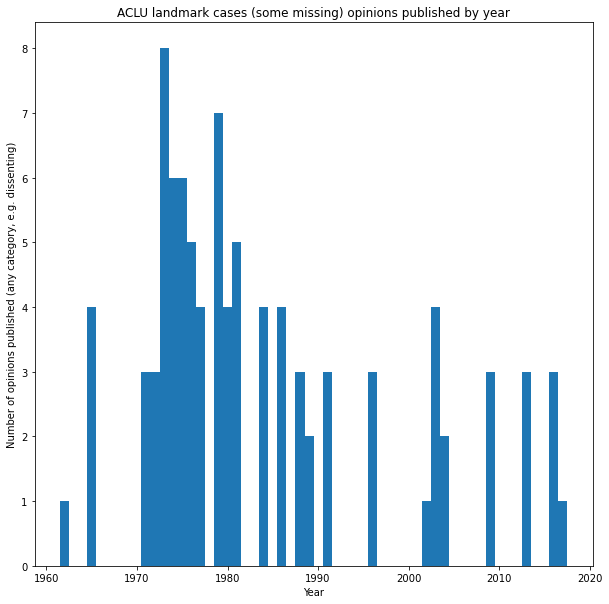

In [7]:
year_filed_counts = Counter(list(aclu_opinions['year_filed']))

x = list()
y = list()
for year, count in year_filed_counts.items():
    x.append(year)
    y.append(count)

years = range(min(x), max(x)+1)
counts = [year_filed_counts[year] for year in years]

plt.bar(x, y, width=1.0)
plt.title("ACLU landmark cases (some missing) opinions published by year")
plt.xlabel("Year")
plt.ylabel("Number of opinions published (any category, e.g. dissenting)")
plt.show()



In [65]:
# Start working with the corpora
aclu_opinions.to_csv('aclu_opinions.csv', index=False)

In [64]:
# Planned Parenthood vs Casey (505 U.S. 833) not available, should be in 1992 year 
opinions_1992 = all_opinions[all_opinions['year_filed'] == 1992].value_counts('case_name')
# pd.set_option('display.max_rows', None)
print(opinions_1992)

case_name
Lucas v. South Carolina Coastal Council                              4
United States v. Thompson/Center Arms Co.                            4
FTC v. Ticor Title Ins. Co.                                          4
Georgia v. McCollum                                                  4
Medina v. California                                                 3
                                                                    ..
Holywell Corp. v. Smith                                              1
PFZ Properties, Inc. v. Rodriguez                                    1
Soldal v. Cook County                                                1
General Motors Corp. v. Romein                                       1
Countyof Yakima v. Confederated Tribes and Bands of Yakima Nation    1
Length: 104, dtype: int64
